# Importing necessary libraries

In [2]:
import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

import sklearn
from sklearn import linear_model
from sklearn import decomposition
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from smt.sampling_methods import LHS

import time
import datetime
import random
import csv
import os
import copy
import json
from tqdm import tqdm



# Plotting

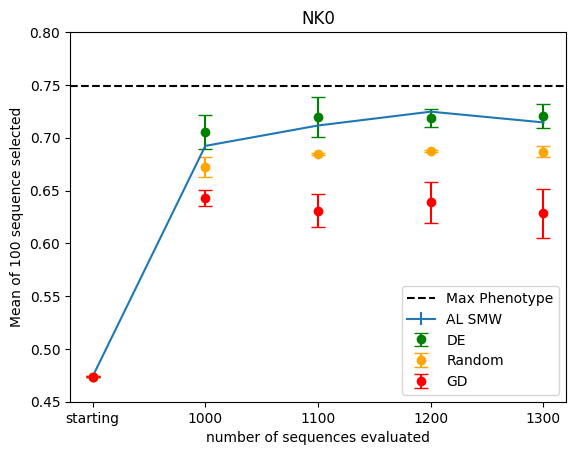

In [2]:
case = "NK0"

nk0_data = pd.read_csv(case + ".csv")
max_phenotype = nk0_data["Phenotype"].max()

# with open('data_ym_K0_random_LHS.txt', 'r') as f:
#     AL_data=json.load(f)
# AL_random = [np.mean(AL_data[0]),np.mean(AL_data[1]), np.mean(AL_data[2]), np.mean(AL_data[3]), np.mean(AL_data[4])]

with open('data_ym_K0_SMW_LHS.txt', 'r') as f:
    smw_data1=json.load(f)
AL_SMW1 = [np.mean(smw_data1[1]), np.mean(smw_data1[2]), np.mean(smw_data1[3]), np.mean(smw_data1[4])]
with open('data_ym_K0_SMW_rd1.txt', 'r') as f:
    smw_data2=json.load(f)
AL_SMW2 = [np.mean(smw_data2[1]), np.mean(smw_data2[2]), np.mean(smw_data2[3]), np.mean(smw_data2[4])]
with open('data_ym_K0_SMW_rd2.txt', 'r') as f:
    smw_data3=json.load(f)
AL_SMW3 = [np.mean(smw_data3[1]), np.mean(smw_data3[2]), np.mean(smw_data3[3]), np.mean(smw_data3[4])]
starting = (np.mean(smw_data1[0])+np.mean(smw_data2[0])+np.mean(smw_data3[0]))/3
starting_std = np.std([np.mean(smw_data1[0]), np.mean(smw_data2[0]), np.mean(smw_data3[0])])
AL_SMW = [starting]+[(AL_SMW1[i]+AL_SMW2[i]+AL_SMW3[i])/3 for i in range(4)]
AL_SMW_std = [starting_std]+[(np.std([AL_SMW1[i], AL_SMW2[i], AL_SMW3[i]])) for i in range(4)]

random_data1 = pd.read_csv(case+"_random_LHS.csv")
random_result1 = [random_data1["real1000"].mean(), random_data1["real1100"].mean(), random_data1["real1200"].mean(), random_data1["real1300"].mean()]
random_data2 = pd.read_csv(case+"_random_rd1.csv")
random_result2 = [random_data2["real1000"].mean(), random_data2["real1100"].mean(), random_data2["real1200"].mean(), random_data2["real1300"].mean()]
random_data3 = pd.read_csv(case+"_random_rd2.csv")
random_result3 = [random_data3["real1000"].mean(), random_data3["real1100"].mean(), random_data3["real1200"].mean(), random_data3["real1300"].mean()]
random_result = [starting]+[(random_result1[i]+random_result2[i]+random_result3[i])/3 for i in range(4)]
random_result_std = [starting_std]+[(np.std([random_result1[i], random_result2[i], random_result3[i]])) for i in range(4)]

de_result1 = [pd.read_csv(case+"_de_1000lhs.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100lhs.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200lhs.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300lhs.csv")["real1300"].mean()]
de_result2 = [pd.read_csv(case+"_de_1000rd1.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100rd1.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200rd1.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300rd1.csv")["real1300"].mean()]
de_result3 = [pd.read_csv(case+"_de_1000rd2.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100rd2.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200rd2.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300rd2.csv")["real1300"].mean()]
de_result = [starting]+[(de_result1[i]+de_result2[i]+de_result3[i])/3 for i in range(4)]
de_result_std = [starting_std]+[(np.std([de_result1[i], de_result2[i], de_result3[i]])) for i in range(4)]


gd_result1 = [pd.read_csv(case+"_gd_1000lhs.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100lhs.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200lhs.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300lhs.csv")["real1300"].mean()]
gd_result2 = [pd.read_csv(case+"_gd_1000rd1.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100rd1.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200rd1.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300rd1.csv")["real1300"].mean()]
gd_result3 = [pd.read_csv(case+"_gd_1000rd2.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100rd2.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200rd2.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300rd2.csv")["real1300"].mean()]
gd_result = [starting]+[(gd_result1[i]+gd_result2[i]+gd_result3[i])/3 for i in range(4)]
gd_result_std = [starting_std]+[(np.std([gd_result1[i], gd_result2[i], gd_result3[i]])) for i in range(4)]



x_labels = ['starting', '1000', '1100', '1200', '1300']
plt.axhline(y=max_phenotype, color='black', linestyle='--', label='Max Phenotype')

plt.errorbar(x_labels, AL_SMW, yerr=AL_SMW_std,label = 'AL SMW')

plt.errorbar(x_labels, de_result, yerr=de_result_std, fmt='o', label='DE', color='green', capsize=5)
plt.errorbar(x_labels, random_result, yerr=random_result_std, fmt='o', label='Random', color='orange', capsize=5)
plt.errorbar(x_labels, gd_result, yerr=gd_result_std, fmt='o', label='GD', color='red', capsize=5)



# Set the x-axis labels
plt.xticks(x_labels)
plt.ylim(0.45, 0.8)
# Add labels and title
plt.xlabel('number of sequences evaluated')
plt.ylabel('Mean of 100 sequence selected')
plt.title('NK0')
plt.legend()
plt.savefig("NK0_replicates.svg")

# Show the plot
plt.show()


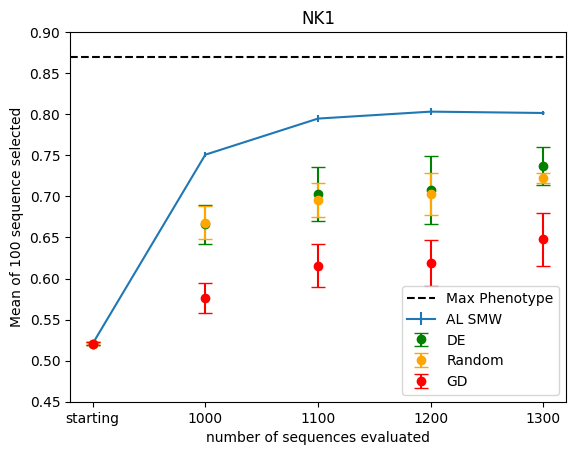

In [ ]:
case = "NK1"

nk1_data = pd.read_csv(case + ".csv")
max_phenotype = nk1_data["Phenotype"].max()

# with open('data_ym_K1_random_LHS.txt', 'r') as f:
#     AL_data=json.load(f)
# AL_random = [np.mean(AL_data[0]),np.mean(AL_data[1]), np.mean(AL_data[2]), np.mean(AL_data[3]), np.mean(AL_data[4])]

with open('data_ym_K1_SMW_LHS.txt', 'r') as f:
    smw_data1=json.load(f)
AL_SMW1 = [np.mean(smw_data1[1]), np.mean(smw_data1[2]), np.mean(smw_data1[3]), np.mean(smw_data1[4])]
with open('data_ym_K1_SMW_rd1.txt', 'r') as f:
    smw_data2=json.load(f)
AL_SMW2 = [np.mean(smw_data2[1]), np.mean(smw_data2[2]), np.mean(smw_data2[3]), np.mean(smw_data2[4])]
with open('data_ym_K1_SMW_rd2.txt', 'r') as f:
    smw_data3=json.load(f)
AL_SMW3 = [np.mean(smw_data3[1]), np.mean(smw_data3[2]), np.mean(smw_data3[3]), np.mean(smw_data3[4])]
starting = (np.mean(smw_data1[0])+np.mean(smw_data2[0])+np.mean(smw_data3[0]))/3
starting_std = np.std([np.mean(smw_data1[0]), np.mean(smw_data2[0]), np.mean(smw_data3[0])])
AL_SMW = [starting]+[(AL_SMW1[i]+AL_SMW2[i]+AL_SMW3[i])/3 for i in range(4)]
AL_SMW_std = [starting_std]+[(np.std([AL_SMW1[i], AL_SMW2[i], AL_SMW3[i]])) for i in range(4)]

random_data1 = pd.read_csv(case+"_random_LHS.csv")
random_result1 = [random_data1["real1000"].mean(), random_data1["real1100"].mean(), random_data1["real1200"].mean(), random_data1["real1300"].mean()]
random_data2 = pd.read_csv(case+"_random_rd1.csv")
random_result2 = [random_data2["real1000"].mean(), random_data2["real1100"].mean(), random_data2["real1200"].mean(), random_data2["real1300"].mean()]
random_data3 = pd.read_csv(case+"_random_rd2.csv")
random_result3 = [random_data3["real1000"].mean(), random_data3["real1100"].mean(), random_data3["real1200"].mean(), random_data3["real1300"].mean()]
random_result = [starting]+[(random_result1[i]+random_result2[i]+random_result3[i])/3 for i in range(4)]
random_result_std = [starting_std]+[(np.std([random_result1[i], random_result2[i], random_result3[i]])) for i in range(4)]

de_result1 = [pd.read_csv(case+"_de_1000lhs.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100lhs.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200lhs.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300lhs.csv")["real1300"].mean()]
de_result2 = [pd.read_csv(case+"_de_1000rd1.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100rd1.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200rd1.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300rd1.csv")["real1300"].mean()]
de_result3 = [pd.read_csv(case+"_de_1000rd2.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100rd2.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200rd2.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300rd2.csv")["real1300"].mean()]
de_result = [starting]+[(de_result1[i]+de_result2[i]+de_result3[i])/3 for i in range(4)]
de_result_std = [starting_std]+[(np.std([de_result1[i], de_result2[i], de_result3[i]])) for i in range(4)]


gd_result1 = [pd.read_csv(case+"_gd_1000lhs.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100lhs.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200lhs.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300lhs.csv")["real1300"].mean()]
gd_result2 = [pd.read_csv(case+"_gd_1000rd1.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100rd1.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200rd1.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300rd1.csv")["real1300"].mean()]
gd_result3 = [pd.read_csv(case+"_gd_1000rd2.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100rd2.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200rd2.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300rd2.csv")["real1300"].mean()]
gd_result = [starting]+[(gd_result1[i]+gd_result2[i]+gd_result3[i])/3 for i in range(4)]
gd_result_std = [starting_std]+[(np.std([gd_result1[i], gd_result2[i], gd_result3[i]])) for i in range(4)]



x_labels = ['starting', '1000', '1100', '1200', '1300']
plt.axhline(y=max_phenotype, color='black', linestyle='--', label='Max Phenotype')

plt.errorbar(x_labels, AL_SMW, yerr=AL_SMW_std,label = 'AL SMW')

plt.errorbar(x_labels, de_result, yerr=de_result_std, fmt='o', label='DE', color='green', capsize=5)
plt.errorbar(x_labels, random_result, yerr=random_result_std, fmt='o', label='Random', color='orange', capsize=5)
plt.errorbar(x_labels, gd_result, yerr=gd_result_std, fmt='o', label='GD', color='red', capsize=5)


# Set the x-axis labels
plt.xticks(x_labels)
plt.ylim(0.45, 0.9)
# Add labels and title
plt.xlabel('number of sequences evaluated')
plt.ylabel('Mean of 100 sequence selected')
plt.title('NK1')
plt.legend()
plt.savefig("NK1_replicates.svg")

# Show the plot
plt.show()


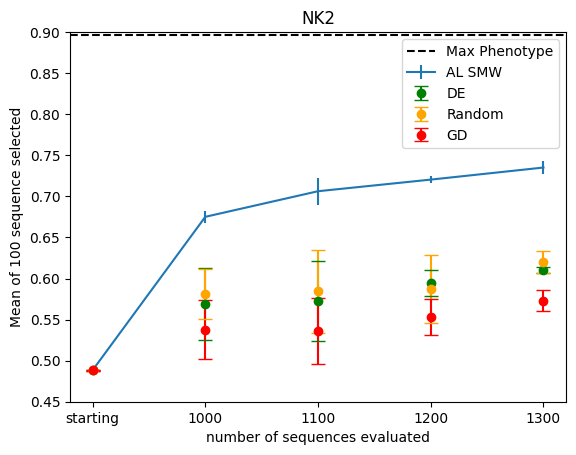

In [ ]:
case = "NK2"

nk2_data = pd.read_csv(case + ".csv")
max_phenotype = nk2_data["Phenotype"].max()

with open('data_ym_K2_random_LHS.txt', 'r') as f:
    AL_data=json.load(f)
AL_random = [np.mean(AL_data[0]),np.mean(AL_data[1]), np.mean(AL_data[2]), np.mean(AL_data[3]), np.mean(AL_data[4])]

with open('data_ym_K2_SMW_LHS.txt', 'r') as f:
    smw_data1=json.load(f)
AL_SMW1 = [np.mean(smw_data1[1]), np.mean(smw_data1[2]), np.mean(smw_data1[3]), np.mean(smw_data1[4])]
with open('data_ym_K2_SMW_rd1.txt', 'r') as f:
    smw_data2=json.load(f)
AL_SMW2 = [np.mean(smw_data2[1]), np.mean(smw_data2[2]), np.mean(smw_data2[3]), np.mean(smw_data2[4])]
with open('data_ym_K2_SMW_rd2.txt', 'r') as f:
    smw_data3=json.load(f)
AL_SMW3 = [np.mean(smw_data3[1]), np.mean(smw_data3[2]), np.mean(smw_data3[3]), np.mean(smw_data3[4])]
starting = (np.mean(smw_data1[0])+np.mean(smw_data2[0])+np.mean(smw_data3[0]))/3
starting_std = np.std([np.mean(smw_data1[0]), np.mean(smw_data2[0]), np.mean(smw_data3[0])])
AL_SMW = [starting]+[(AL_SMW1[i]+AL_SMW2[i]+AL_SMW3[i])/3 for i in range(4)]
AL_SMW_std = [starting_std]+[(np.std([AL_SMW1[i], AL_SMW2[i], AL_SMW3[i]])) for i in range(4)]

random_data1 = pd.read_csv(case+"_random_LHS.csv")
random_result1 = [random_data1["real1000"].mean(), random_data1["real1100"].mean(), random_data1["real1200"].mean(), random_data1["real1300"].mean()]
random_data2 = pd.read_csv(case+"_random_rd1.csv")
random_result2 = [random_data2["real1000"].mean(), random_data2["real1100"].mean(), random_data2["real1200"].mean(), random_data2["real1300"].mean()]
random_data3 = pd.read_csv(case+"_random_rd2.csv")
random_result3 = [random_data3["real1000"].mean(), random_data3["real1100"].mean(), random_data3["real1200"].mean(), random_data3["real1300"].mean()]
random_result = [starting]+[(random_result1[i]+random_result2[i]+random_result3[i])/3 for i in range(4)]
random_result_std = [starting_std]+[(np.std([random_result1[i], random_result2[i], random_result3[i]])) for i in range(4)]

de_result1 = [pd.read_csv(case+"_de_1000lhs.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100lhs.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200lhs.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300lhs.csv")["real1300"].mean()]
de_result2 = [pd.read_csv(case+"_de_1000rd1.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100rd1.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200rd1.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300rd1.csv")["real1300"].mean()]
de_result3 = [pd.read_csv(case+"_de_1000rd2.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100rd2.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200rd2.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300rd2.csv")["real1300"].mean()]
de_result = [starting]+[(de_result1[i]+de_result2[i]+de_result3[i])/3 for i in range(4)]
de_result_std = [starting_std]+[(np.std([de_result1[i], de_result2[i], de_result3[i]])) for i in range(4)]

x_labels = ['starting', '1000', '1100', '1200', '1300']

gd_result1 = [pd.read_csv(case+"_gd_1000lhs.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100lhs.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200lhs.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300lhs.csv")["real1300"].mean()]
gd_result2 = [pd.read_csv(case+"_gd_1000rd1.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100rd1.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200rd1.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300rd1.csv")["real1300"].mean()]
gd_result3 = [pd.read_csv(case+"_gd_1000rd2.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100rd2.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200rd2.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300rd2.csv")["real1300"].mean()]
gd_result = [starting]+[(gd_result1[i]+gd_result2[i]+gd_result3[i])/3 for i in range(4)]
gd_result_std = [starting_std]+[(np.std([gd_result1[i], gd_result2[i], gd_result3[i]])) for i in range(4)]



x_labels = ['starting', '1000', '1100', '1200', '1300']
plt.axhline(y=max_phenotype, color='black', linestyle='--', label='Max Phenotype')

plt.errorbar(x_labels, AL_SMW, yerr=AL_SMW_std,label = 'AL SMW')

plt.errorbar(x_labels, de_result, yerr=de_result_std, fmt='o', label='DE', color='green', capsize=5)
plt.errorbar(x_labels, random_result, yerr=random_result_std, fmt='o', label='Random', color='orange', capsize=5)
plt.errorbar(x_labels, gd_result, yerr=gd_result_std, fmt='o', label='GD', color='red', capsize=5)

# Set the x-axis labels
plt.xticks(x_labels)
plt.ylim(0.45, 0.9)
# Add labels and title
plt.xlabel('number of sequences evaluated')
plt.ylabel('Mean of 100 sequence selected')
plt.title('NK2')
plt.legend()
plt.savefig("NK2_replicates.svg")

# Show the plot
plt.show()


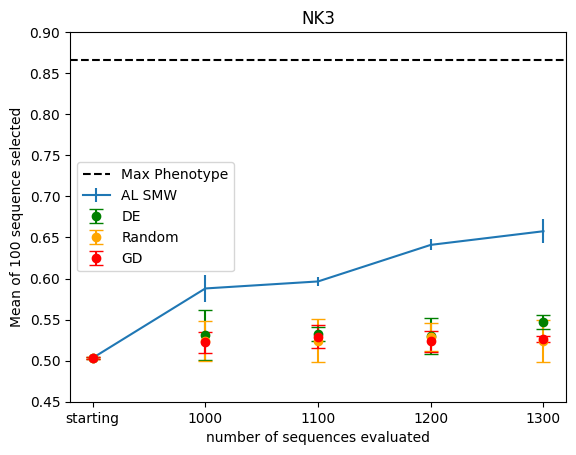

In [ ]:
case = "NK3"

nk3_data = pd.read_csv(case + ".csv")
max_phenotype = nk3_data["Phenotype"].max()

with open('data_ym_K3_random_LHS.txt', 'r') as f:
    AL_data=json.load(f)
AL_random = [np.mean(AL_data[0]),np.mean(AL_data[1]), np.mean(AL_data[2]), np.mean(AL_data[3]), np.mean(AL_data[4])]

with open('data_ym_K3_SMW_LHS.txt', 'r') as f:
    smw_data1=json.load(f)
AL_SMW1 = [np.mean(smw_data1[1]), np.mean(smw_data1[2]), np.mean(smw_data1[3]), np.mean(smw_data1[4])]
with open('data_ym_K3_SMW_rd1.txt', 'r') as f:
    smw_data2=json.load(f)
AL_SMW2 = [np.mean(smw_data2[1]), np.mean(smw_data2[2]), np.mean(smw_data2[3]), np.mean(smw_data2[4])]
with open('data_ym_K3_SMW_rd2.txt', 'r') as f:
    smw_data3=json.load(f)
AL_SMW3 = [np.mean(smw_data3[1]), np.mean(smw_data3[2]), np.mean(smw_data3[3]), np.mean(smw_data3[4])]
starting = (np.mean(smw_data1[0])+np.mean(smw_data2[0])+np.mean(smw_data3[0]))/3
starting_std = np.std([np.mean(smw_data1[0]), np.mean(smw_data2[0]), np.mean(smw_data3[0])])
AL_SMW = [starting]+[(AL_SMW1[i]+AL_SMW2[i]+AL_SMW3[i])/3 for i in range(4)]
AL_SMW_std = [starting_std]+[(np.std([AL_SMW1[i], AL_SMW2[i], AL_SMW3[i]])) for i in range(4)]

random_data1 = pd.read_csv(case+"_random_LHS.csv")
random_result1 = [random_data1["real1000"].mean(), random_data1["real1100"].mean(), random_data1["real1200"].mean(), random_data1["real1300"].mean()]
random_data2 = pd.read_csv(case+"_random_rd1.csv")
random_result2 = [random_data2["real1000"].mean(), random_data2["real1100"].mean(), random_data2["real1200"].mean(), random_data2["real1300"].mean()]
random_data3 = pd.read_csv(case+"_random_rd2.csv")
random_result3 = [random_data3["real1000"].mean(), random_data3["real1100"].mean(), random_data3["real1200"].mean(), random_data3["real1300"].mean()]
random_result = [starting]+[(random_result1[i]+random_result2[i]+random_result3[i])/3 for i in range(4)]
random_result_std = [starting_std]+[(np.std([random_result1[i], random_result2[i], random_result3[i]])) for i in range(4)]

de_result1 = [pd.read_csv(case+"_de_1000lhs.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100lhs.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200lhs.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300lhs.csv")["real1300"].mean()]
de_result2 = [pd.read_csv(case+"_de_1000rd1.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100rd1.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200rd1.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300rd1.csv")["real1300"].mean()]
de_result3 = [pd.read_csv(case+"_de_1000rd2.csv")["real1000"].mean(), pd.read_csv(case+"_de_1100rd2.csv")["real1100"].mean(), pd.read_csv(case+"_de_1200rd2.csv")["real1200"].mean(), pd.read_csv(case+"_de_1300rd2.csv")["real1300"].mean()]
de_result = [starting]+[(de_result1[i]+de_result2[i]+de_result3[i])/3 for i in range(4)]
de_result_std = [starting_std]+[(np.std([de_result1[i], de_result2[i], de_result3[i]])) for i in range(4)]


gd_result1 = [pd.read_csv(case+"_gd_1000lhs.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100lhs.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200lhs.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300lhs.csv")["real1300"].mean()]
gd_result2 = [pd.read_csv(case+"_gd_1000rd1.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100rd1.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200rd1.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300rd1.csv")["real1300"].mean()]
gd_result3 = [pd.read_csv(case+"_gd_1000rd2.csv")["real1000"].mean(), pd.read_csv(case+"_gd_1100rd2.csv")["real1100"].mean(), pd.read_csv(case+"_gd_1200rd2.csv")["real1200"].mean(), pd.read_csv(case+"_gd_1300rd2.csv")["real1300"].mean()]
gd_result = [starting]+[(gd_result1[i]+gd_result2[i]+gd_result3[i])/3 for i in range(4)]
gd_result_std = [starting_std]+[(np.std([gd_result1[i], gd_result2[i], gd_result3[i]])) for i in range(4)]



x_labels = ['starting', '1000', '1100', '1200', '1300']
plt.axhline(y=max_phenotype, color='black', linestyle='--', label='Max Phenotype')

plt.errorbar(x_labels, AL_SMW, yerr=AL_SMW_std,label = 'AL SMW')

plt.errorbar(x_labels, de_result, yerr=de_result_std, fmt='o', label='DE', color='green', capsize=5)
plt.errorbar(x_labels, random_result, yerr=random_result_std, fmt='o', label='Random', color='orange', capsize=5)
plt.errorbar(x_labels, gd_result, yerr=gd_result_std, fmt='o', label='GD', color='red', capsize=5)


# Set the x-axis labels
plt.xticks(x_labels)
plt.ylim(0.45, 0.9)
# Add labels and title
plt.xlabel('number of sequences evaluated')
plt.ylabel('Mean of 100 sequence selected')
plt.title('NK3')
plt.legend()
plt.savefig("NK3_replicates.svg")
# Show the plot
plt.show()


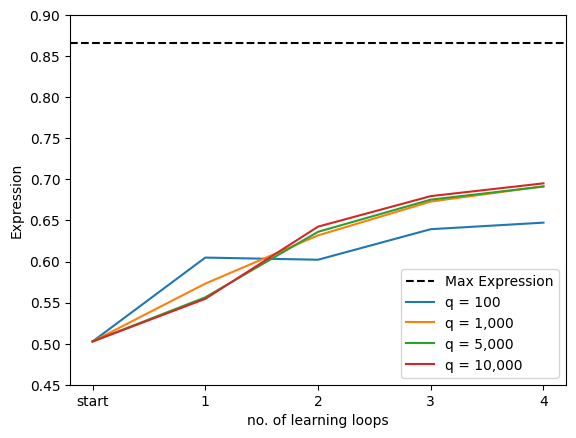

In [5]:
case = "NK3"

nk0_data = pd.read_csv(case + ".csv")
max_phenotype = nk0_data["Phenotype"].max()

with open('data_ym_K3_SMW_LHS.txt', 'r') as f:
    smw_data1=json.load(f)
AL_SMW1 = [np.mean(smw_data1[0]),np.mean(smw_data1[1]), np.mean(smw_data1[2]), np.mean(smw_data1[3]), np.mean(smw_data1[4])]


with open('data_ym_K3_1000_ALDE.txt', 'r') as f:
    smw_data1=json.load(f)
AL_SMW2 = [np.mean(smw_data1[0]),np.mean(smw_data1[1]), np.mean(smw_data1[2]), np.mean(smw_data1[3]), np.mean(smw_data1[4])]

with open('data_ym_K3_5000_ALDE.txt', 'r') as f:
    smw_data1=json.load(f)
AL_SMW3 = [np.mean(smw_data1[0]),np.mean(smw_data1[1]), np.mean(smw_data1[2]), np.mean(smw_data1[3]), np.mean(smw_data1[4])]

with open('data_ym_K3_10000_ALDE.txt', 'r') as f:
    smw_data1=json.load(f)
AL_SMW4 = [np.mean(smw_data1[0]),np.mean(smw_data1[1]), np.mean(smw_data1[2]), np.mean(smw_data1[3]), np.mean(smw_data1[4])]


x_labels = ['start', '1', '2', '3', '4']
plt.axhline(y=max_phenotype, color='black', linestyle='--', label='Max Expression')

plt.plot(x_labels, AL_SMW1, label = 'q = 100')
plt.plot(x_labels, AL_SMW2, label = 'q = 1,000')
plt.plot(x_labels, AL_SMW3, label = 'q = 5,000')
plt.plot(x_labels, AL_SMW4, label = 'q = 10,000')

# Set the x-axis labels
plt.xticks(x_labels)
plt.ylim(0.45, 0.9)
# Add labels and title
plt.xlabel('no. of learning loops')
plt.ylabel('Expression')
# plt.title('NK3 batch size sweep')
plt.legend()
plt.savefig("NK3_batchsweep.pdf")
# Show the plot
plt.show()

In [ ]:
case = "NK3"

nk0_data = pd.read_csv(case + ".csv")
max_phenotype = nk0_data["Phenotype"].max()


with open('data_ym_K3_1000_ALDE.txt', 'r') as f:
    smw_data1=json.load(f)
AL_SMW2 = [np.mean(smw_data1[0]),np.mean(smw_data1[1]), np.mean(smw_data1[2]), np.mean(smw_data1[3]), np.mean(smw_data1[4]), np.mean(smw_data1[5]), np.mean(smw_data1[6]), np.mean(smw_data1[7]), np.mean(smw_data1[8]), np.mean(smw_data1[9]), np.mean(smw_data1[10])]

with open('data_ym_K3_5000_ALDE.txt', 'r') as f:
    smw_data1=json.load(f)
AL_SMW3 = [np.mean(smw_data1[0]),np.mean(smw_data1[1]), np.mean(smw_data1[2]), np.mean(smw_data1[3]), np.mean(smw_data1[4]), np.mean(smw_data1[5]), np.mean(smw_data1[6]), np.mean(smw_data1[7]), np.mean(smw_data1[8]), np.mean(smw_data1[9]), np.mean(smw_data1[10])]

with open('data_ym_K3_10000_ALDE.txt', 'r') as f:
    smw_data1=json.load(f)
AL_SMW4 = [np.mean(smw_data1[0]),np.mean(smw_data1[1]), np.mean(smw_data1[2]), np.mean(smw_data1[3]), np.mean(smw_data1[4]), np.mean(smw_data1[5]), np.mean(smw_data1[6]), np.mean(smw_data1[7]), np.mean(smw_data1[8]), np.mean(smw_data1[9]), np.mean(smw_data1[10])]


x_labels = ['start', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
plt.axhline(y=max_phenotype, color='black', linestyle='--', label='Max Expression')


plt.plot(x_labels, AL_SMW2, label = 'AL - larger batch (1000)')
plt.plot(x_labels, AL_SMW3, label = 'AL - larger batch (5000)')
plt.plot(x_labels, AL_SMW4, label = 'AL - larger batch (10000)')

# Set the x-axis labels
plt.xticks(x_labels)
plt.ylim(0.45, 0.9)
# Add labels and title
plt.xlabel('no. of learning loops')
plt.ylabel('Expression')
plt.title('NK3 batch size sweep')
plt.legend()
plt.savefig("NK3_batchsweep.pdf")
# Show the plot
plt.show()

IndexError: list index out of range

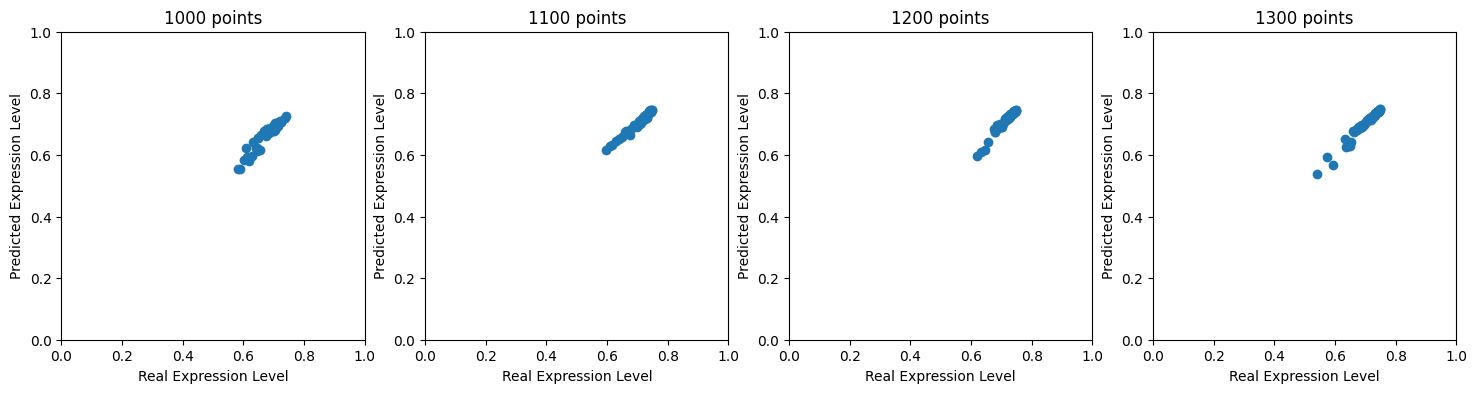

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data
with open('data_ym_K0_SMW_LHS.txt', 'r') as f:
    data_real = json.load(f)
with open('data_yp_K0_SMW_LHS.txt', 'r') as f:
    data_predicted = json.load(f)


# Extract x and y values for each plot
x1, y1 = data_real[1], data_predicted[0][-100:]
x2, y2 = data_real[2], data_predicted[1][-100:]
x3, y3 = data_real[3], data_predicted[2][-100:]
x4, y4 = data_real[4], data_predicted[3][-100:]

# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Plot scatter plots
axs[0].scatter(x1, y1)
axs[0].set_title('1000 points')
axs[0].set_xlabel('Real Expression Level')  
axs[0].set_ylabel('Predicted Expression Level')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

axs[1].scatter(x2, y2)
axs[1].set_title('1100 points')
axs[1].set_xlabel('Real Expression Level')
axs[1].set_ylabel('Predicted Expression Level')
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)

axs[2].scatter(x3, y3)
axs[2].set_title('1200 points')
axs[2].set_xlabel('Real Expression Level')
axs[2].set_ylabel('Predicted Expression Level')
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)

axs[3].scatter(x4, y4)
axs[3].set_title('1300 points')
axs[3].set_xlabel('Real Expression Level')
axs[3].set_ylabel('Predicted Expression Level')
axs[3].set_xlim(0, 1)
axs[3].set_ylim(0, 1)

plt.savefig("NK0_SMW_scatter.pdf")
# Show the plot
plt.show()

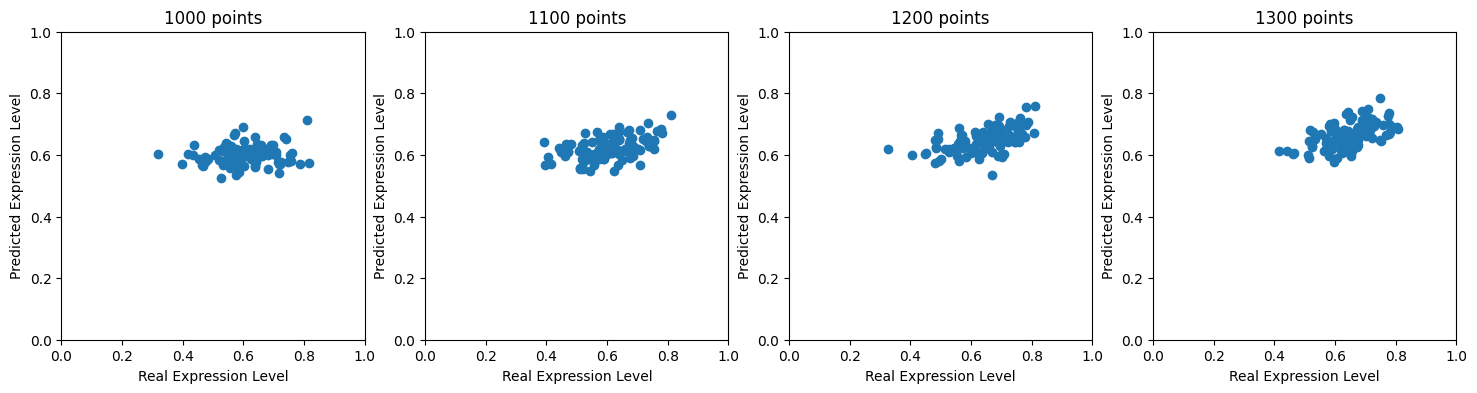

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data
with open('data_ym_K3_SMW_LHS.txt', 'r') as f:
    data_real = json.load(f)
with open('data_yp_K3_SMW_LHS.txt', 'r') as f:
    data_predicted = json.load(f)


# Extract x and y values for each plot
x1, y1 = data_real[1], data_predicted[0][-100:]
x2, y2 = data_real[2], data_predicted[1][-100:]
x3, y3 = data_real[3], data_predicted[2][-100:]
x4, y4 = data_real[4], data_predicted[3][-100:]

# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Plot scatter plots
axs[0].scatter(x1, y1)
axs[0].set_title('1000 points')
axs[0].set_xlabel('Real Expression Level')  
axs[0].set_ylabel('Predicted Expression Level')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

axs[1].scatter(x2, y2)
axs[1].set_title('1100 points')
axs[1].set_xlabel('Real Expression Level')
axs[1].set_ylabel('Predicted Expression Level')
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)

axs[2].scatter(x3, y3)
axs[2].set_title('1200 points')
axs[2].set_xlabel('Real Expression Level')
axs[2].set_ylabel('Predicted Expression Level')
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)

axs[3].scatter(x4, y4)
axs[3].set_title('1300 points')
axs[3].set_xlabel('Real Expression Level')
axs[3].set_ylabel('Predicted Expression Level')
axs[3].set_xlim(0, 1)
axs[3].set_ylim(0, 1)

plt.savefig("NK3_SMW_scatter.pdf")
# Show the plot
plt.show()

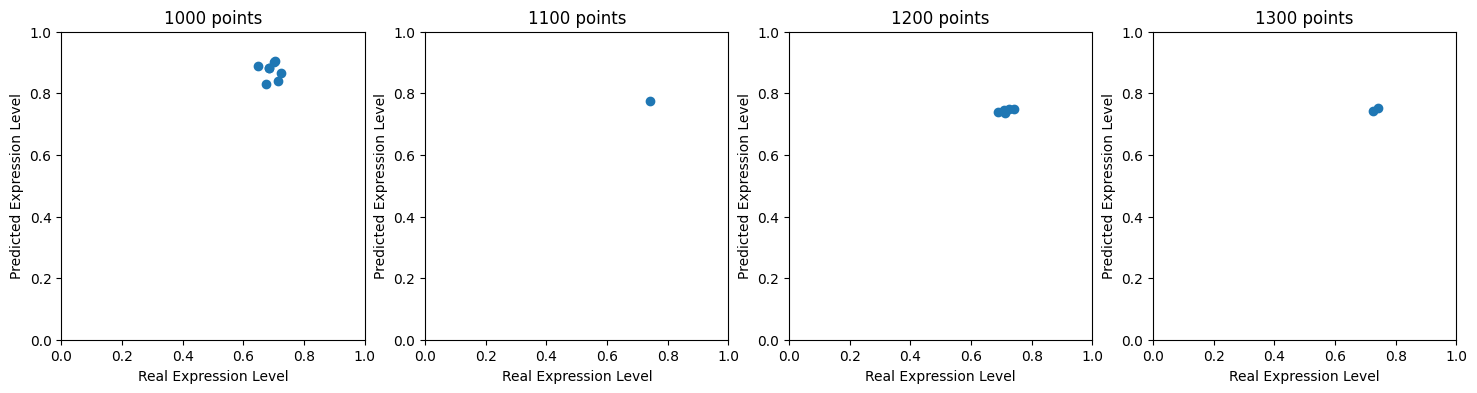

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV files
data1 = pd.read_csv('NK0_de_1000lhs.csv')
data2 = pd.read_csv('NK0_de_1100lhs.csv')
data3 = pd.read_csv('NK0_de_1200lhs.csv')
data4 = pd.read_csv('NK0_de_1300lhs.csv')


# Extract x and y values for each plot
x1, y1 = data1['real1000'], data1['evaluation1000']
x2, y2 = data2['real1100'], data2['evaluation1100']
x3, y3 = data3['real1200'], data3['evaluation1200']
x4, y4 = data4['real1300'], data4['evaluation1300']

# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Plot scatter plots
axs[0].scatter(x1, y1)
axs[0].set_title('1000 points')
axs[0].set_xlabel('Real Expression Level')  
axs[0].set_ylabel('Predicted Expression Level')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

axs[1].scatter(x2, y2)
axs[1].set_title('1100 points')
axs[1].set_xlabel('Real Expression Level')
axs[1].set_ylabel('Predicted Expression Level')
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)

axs[2].scatter(x3, y3)
axs[2].set_title('1200 points')
axs[2].set_xlabel('Real Expression Level')
axs[2].set_ylabel('Predicted Expression Level')
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)

axs[3].scatter(x4, y4)
axs[3].set_title('1300 points')
axs[3].set_xlabel('Real Expression Level')
axs[3].set_ylabel('Predicted Expression Level')
axs[3].set_xlim(0, 1)
axs[3].set_ylim(0, 1)
plt.savefig("NK0_de_scatter.pdf")
# Show the plot
plt.show()

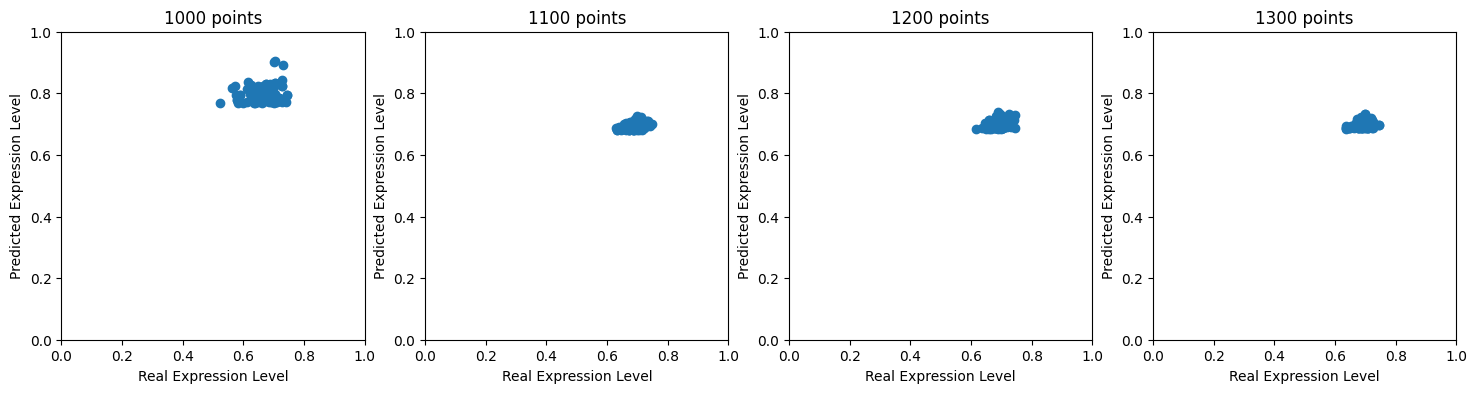

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV files
data1 = pd.read_csv('NK0_random_LHS.csv')
data2 = pd.read_csv('NK0_random_LHS.csv')
data3 = pd.read_csv('NK0_random_LHS.csv')
data4 = pd.read_csv('NK0_random_LHS.csv')


# Extract x and y values for each plot
x1, y1 = data1['real1000'], data1['evaluation1000']
x2, y2 = data2['real1100'], data2['evaluation1100']
x3, y3 = data3['real1200'], data3['evaluation1200']
x4, y4 = data4['real1300'], data4['evaluation1300']

# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Plot scatter plots
axs[0].scatter(x1, y1)
axs[0].set_title('1000 points')
axs[0].set_xlabel('Real Expression Level')  
axs[0].set_ylabel('Predicted Expression Level')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

axs[1].scatter(x2, y2)
axs[1].set_title('1100 points')
axs[1].set_xlabel('Real Expression Level')
axs[1].set_ylabel('Predicted Expression Level')
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)

axs[2].scatter(x3, y3)
axs[2].set_title('1200 points')
axs[2].set_xlabel('Real Expression Level')
axs[2].set_ylabel('Predicted Expression Level')
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)

axs[3].scatter(x4, y4)
axs[3].set_title('1300 points')
axs[3].set_xlabel('Real Expression Level')
axs[3].set_ylabel('Predicted Expression Level')
axs[3].set_xlim(0, 1)
axs[3].set_ylim(0, 1)
plt.savefig("NK0_rs_scatter.pdf")
# Show the plot
plt.show()

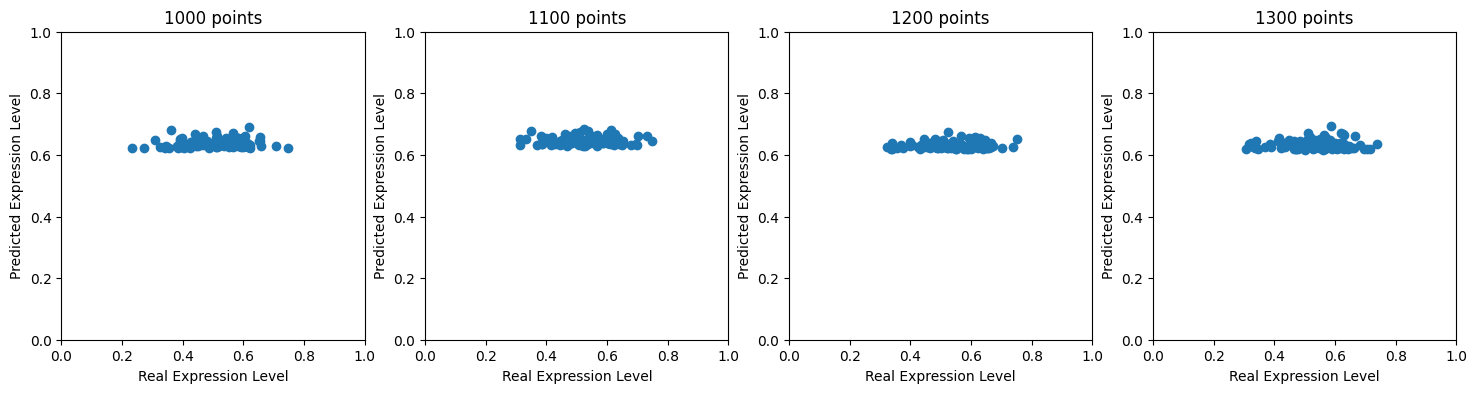

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV files
data1 = pd.read_csv('NK3_random_LHS.csv')
data2 = pd.read_csv('NK3_random_LHS.csv')
data3 = pd.read_csv('NK3_random_LHS.csv')
data4 = pd.read_csv('NK3_random_LHS.csv')


# Extract x and y values for each plot
x1, y1 = data1['real1000'], data1['evaluation1000']
x2, y2 = data2['real1100'], data2['evaluation1100']
x3, y3 = data3['real1200'], data3['evaluation1200']
x4, y4 = data4['real1300'], data4['evaluation1300']

# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Plot scatter plots
axs[0].scatter(x1, y1)
axs[0].set_title('1000 points')
axs[0].set_xlabel('Real Expression Level')  
axs[0].set_ylabel('Predicted Expression Level')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

axs[1].scatter(x2, y2)
axs[1].set_title('1100 points')
axs[1].set_xlabel('Real Expression Level')
axs[1].set_ylabel('Predicted Expression Level')
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)

axs[2].scatter(x3, y3)
axs[2].set_title('1200 points')
axs[2].set_xlabel('Real Expression Level')
axs[2].set_ylabel('Predicted Expression Level')
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)

axs[3].scatter(x4, y4)
axs[3].set_title('1300 points')
axs[3].set_xlabel('Real Expression Level')
axs[3].set_ylabel('Predicted Expression Level')
axs[3].set_xlim(0, 1)
axs[3].set_ylim(0, 1)
plt.savefig("NK3_rs_scatter.pdf")
# Show the plot
plt.show()

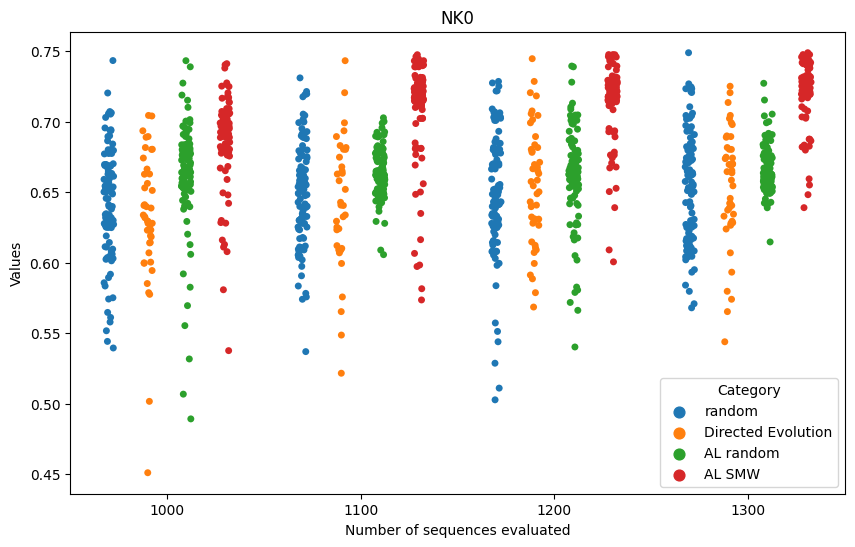

In [30]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

case = "NK0"

# Load AL data
with open('data_ym_K0_plor7.txt', 'r') as f:
    AL_data = json.load(f)

# Load SMW data
with open('data_ym_K0_SMW.txt', 'r') as f:
    smw_data = json.load(f)

# Load random data
random_data = pd.read_csv(case + "_random.csv")

# Load DE data
de_data_1000 = pd.read_csv(case + "_de_1000.csv")
de_data_1100 = pd.read_csv(case + "_de_1100.csv")
de_data_1200 = pd.read_csv(case + "_de_1200.csv")
de_data_1300 = pd.read_csv(case + "_de_1300.csv")

# Prepare the data
x_labels = [1000, 1100, 1200, 1300]

# Combine the data into a DataFrame
data = {
    'X': [x_labels[0]] * len(random_data["real1000"]) + [x_labels[1]] * len(random_data["real1100"]) + [x_labels[2]] * len(random_data["real1200"]) + [x_labels[3]] * len(random_data["real1300"]) +
         [x_labels[0]] * len(de_data_1000["real1000"]) + [x_labels[1]] * len(de_data_1100["real1100"]) + [x_labels[2]] * len(de_data_1200["real1200"]) + [x_labels[3]] * len(de_data_1300["real1300"]) +
         [x_labels[0]] * len(AL_data[1]) + [x_labels[1]] * len(AL_data[2]) + [x_labels[2]] * len(AL_data[3]) + [x_labels[3]] * len(AL_data[4]) +
         [x_labels[0]] * len(smw_data[1]) + [x_labels[1]] * len(smw_data[2]) + [x_labels[2]] * len(smw_data[3]) + [x_labels[3]] * len(smw_data[4]),
    'Values': list(random_data["real1000"]) + list(random_data["real1100"]) + list(random_data["real1200"]) + list(random_data["real1300"]) +
              list(de_data_1000["real1000"]) + list(de_data_1100["real1100"]) + list(de_data_1200["real1200"]) + list(de_data_1300["real1300"]) +
              AL_data[1] + AL_data[2] + AL_data[3] + AL_data[4] +
              smw_data[1] + smw_data[2] + smw_data[3] + smw_data[4],
    'Category': ['random'] * (len(random_data["real1000"]) + len(random_data["real1100"]) + len(random_data["real1200"]) + len(random_data["real1300"])) +
                ['Directed Evolution'] * (len(de_data_1000["real1000"]) + len(de_data_1100["real1100"]) + len(de_data_1200["real1200"]) + len(de_data_1300["real1300"])) +
                ['AL random'] * (len(AL_data[1]) + len(AL_data[2]) + len(AL_data[3]) + len(AL_data[4])) +
                ['AL SMW'] * (len(smw_data[1]) + len(smw_data[2]) + len(smw_data[3]) + len(smw_data[4]))
}

df = pd.DataFrame(data)

# Create the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='X', y='Values', hue='Category', data=df, jitter=True, dodge=True)

# Add labels and title
plt.xlabel('Number of sequences evaluated')
plt.ylabel('Values')
plt.title('NK0')
plt.legend(title='Category')

# Show the plot
plt.show()

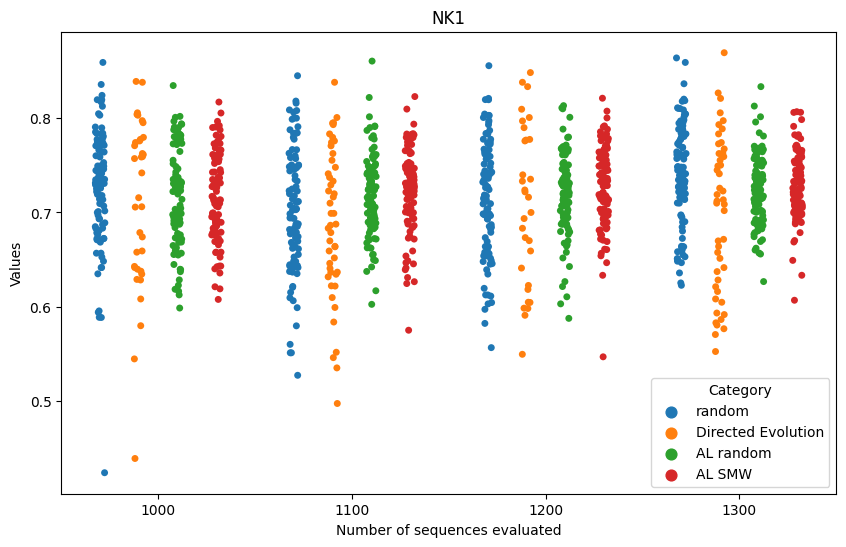

In [31]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

case = "NK1"

# Load AL data
with open('data_ym_K1_plor7.txt', 'r') as f:
    AL_data = json.load(f)

# Load SMW data
with open('data_ym_K1_SMW.txt', 'r') as f:
    smw_data = json.load(f)

# Load random data
random_data = pd.read_csv(case + "_random.csv")

# Load DE data
de_data_1000 = pd.read_csv(case + "_de_1000.csv")
de_data_1100 = pd.read_csv(case + "_de_1100.csv")
de_data_1200 = pd.read_csv(case + "_de_1200.csv")
de_data_1300 = pd.read_csv(case + "_de_1300.csv")

# Prepare the data
x_labels = [1000, 1100, 1200, 1300]

# Combine the data into a DataFrame
data = {
    'X': [x_labels[0]] * len(random_data["real1000"]) + [x_labels[1]] * len(random_data["real1100"]) + [x_labels[2]] * len(random_data["real1200"]) + [x_labels[3]] * len(random_data["real1300"]) +
         [x_labels[0]] * len(de_data_1000["real1000"]) + [x_labels[1]] * len(de_data_1100["real1100"]) + [x_labels[2]] * len(de_data_1200["real1200"]) + [x_labels[3]] * len(de_data_1300["real1300"]) +
         [x_labels[0]] * len(AL_data[1]) + [x_labels[1]] * len(AL_data[2]) + [x_labels[2]] * len(AL_data[3]) + [x_labels[3]] * len(AL_data[4]) +
         [x_labels[0]] * len(smw_data[1]) + [x_labels[1]] * len(smw_data[2]) + [x_labels[2]] * len(smw_data[3]) + [x_labels[3]] * len(smw_data[4]),
    'Values': list(random_data["real1000"]) + list(random_data["real1100"]) + list(random_data["real1200"]) + list(random_data["real1300"]) +
              list(de_data_1000["real1000"]) + list(de_data_1100["real1100"]) + list(de_data_1200["real1200"]) + list(de_data_1300["real1300"]) +
              AL_data[1] + AL_data[2] + AL_data[3] + AL_data[4] +
              smw_data[1] + smw_data[2] + smw_data[3] + smw_data[4],
    'Category': ['random'] * (len(random_data["real1000"]) + len(random_data["real1100"]) + len(random_data["real1200"]) + len(random_data["real1300"])) +
                ['Directed Evolution'] * (len(de_data_1000["real1000"]) + len(de_data_1100["real1100"]) + len(de_data_1200["real1200"]) + len(de_data_1300["real1300"])) +
                ['AL random'] * (len(AL_data[1]) + len(AL_data[2]) + len(AL_data[3]) + len(AL_data[4])) +
                ['AL SMW'] * (len(smw_data[1]) + len(smw_data[2]) + len(smw_data[3]) + len(smw_data[4]))
}

df = pd.DataFrame(data)

# Create the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='X', y='Values', hue='Category', data=df, jitter=True, dodge=True)

# Add labels and title
plt.xlabel('Number of sequences evaluated')
plt.ylabel('Values')
plt.title('NK1')
plt.legend(title='Category')

# Show the plot
plt.show()

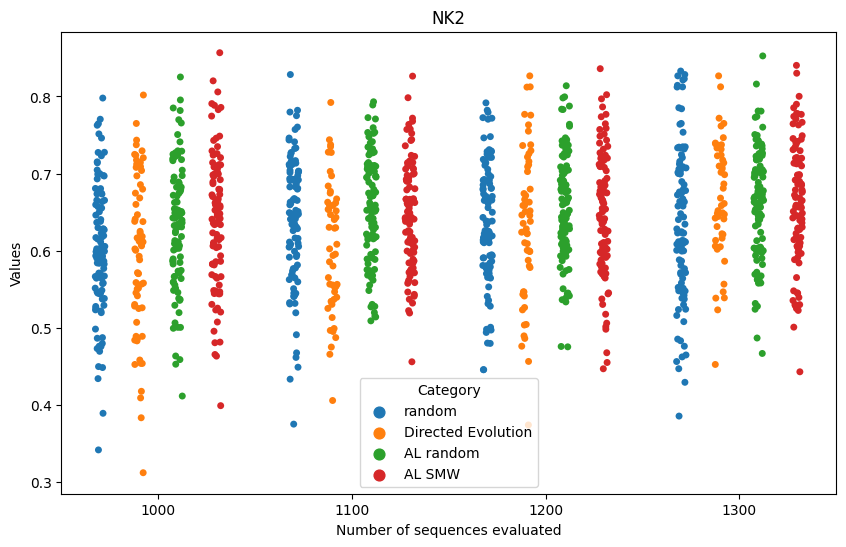

In [32]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

case = "NK2"

# Load AL data
with open('data_ym_K2_plor7.txt', 'r') as f:
    AL_data = json.load(f)

# Load SMW data
with open('data_ym_K2_SMW.txt', 'r') as f:
    smw_data = json.load(f)

# Load random data
random_data = pd.read_csv(case + "_random.csv")

# Load DE data
de_data_1000 = pd.read_csv(case + "_de_1000.csv")
de_data_1100 = pd.read_csv(case + "_de_1100.csv")
de_data_1200 = pd.read_csv(case + "_de_1200.csv")
de_data_1300 = pd.read_csv(case + "_de_1300.csv")

# Prepare the data
x_labels = [1000, 1100, 1200, 1300]

# Combine the data into a DataFrame
data = {
    'X': [x_labels[0]] * len(random_data["real1000"]) + [x_labels[1]] * len(random_data["real1100"]) + [x_labels[2]] * len(random_data["real1200"]) + [x_labels[3]] * len(random_data["real1300"]) +
         [x_labels[0]] * len(de_data_1000["real1000"]) + [x_labels[1]] * len(de_data_1100["real1100"]) + [x_labels[2]] * len(de_data_1200["real1200"]) + [x_labels[3]] * len(de_data_1300["real1300"]) +
         [x_labels[0]] * len(AL_data[1]) + [x_labels[1]] * len(AL_data[2]) + [x_labels[2]] * len(AL_data[3]) + [x_labels[3]] * len(AL_data[4]) +
         [x_labels[0]] * len(smw_data[1]) + [x_labels[1]] * len(smw_data[2]) + [x_labels[2]] * len(smw_data[3]) + [x_labels[3]] * len(smw_data[4]),
    'Values': list(random_data["real1000"]) + list(random_data["real1100"]) + list(random_data["real1200"]) + list(random_data["real1300"]) +
              list(de_data_1000["real1000"]) + list(de_data_1100["real1100"]) + list(de_data_1200["real1200"]) + list(de_data_1300["real1300"]) +
              AL_data[1] + AL_data[2] + AL_data[3] + AL_data[4] +
              smw_data[1] + smw_data[2] + smw_data[3] + smw_data[4],
    'Category': ['random'] * (len(random_data["real1000"]) + len(random_data["real1100"]) + len(random_data["real1200"]) + len(random_data["real1300"])) +
                ['Directed Evolution'] * (len(de_data_1000["real1000"]) + len(de_data_1100["real1100"]) + len(de_data_1200["real1200"]) + len(de_data_1300["real1300"])) +
                ['AL random'] * (len(AL_data[1]) + len(AL_data[2]) + len(AL_data[3]) + len(AL_data[4])) +
                ['AL SMW'] * (len(smw_data[1]) + len(smw_data[2]) + len(smw_data[3]) + len(smw_data[4]))
}

df = pd.DataFrame(data)

# Create the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='X', y='Values', hue='Category', data=df, jitter=True, dodge=True)

# Add labels and title
plt.xlabel('Number of sequences evaluated')
plt.ylabel('Values')
plt.title('NK2')
plt.legend(title='Category')

# Show the plot
plt.show()

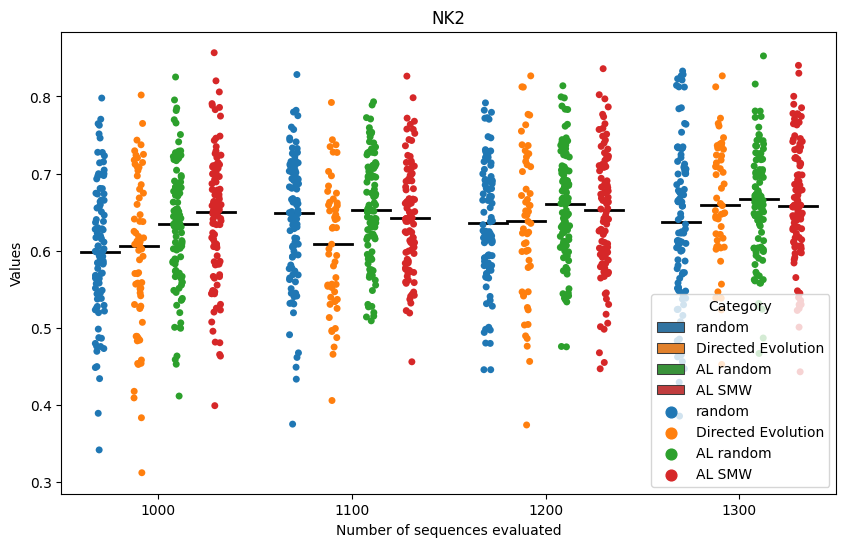

In [56]:
case = "NK2"

# Load AL data
with open('data_ym_K2_plor7.txt', 'r') as f:
    AL_data = json.load(f)

# Load SMW data
with open('data_ym_K2_SMW.txt', 'r') as f:
    smw_data = json.load(f)

# Load random data
random_data = pd.read_csv(case + "_random.csv")

# Load DE data
de_data_1000 = pd.read_csv(case + "_de_1000.csv")
de_data_1100 = pd.read_csv(case + "_de_1100.csv")
de_data_1200 = pd.read_csv(case + "_de_1200.csv")
de_data_1300 = pd.read_csv(case + "_de_1300.csv")

# Prepare the data
x_labels = [1000, 1100, 1200, 1300]

# Combine the data into a DataFrame
data = {
    'X': [x_labels[0]] * len(random_data["real1000"]) + [x_labels[1]] * len(random_data["real1100"]) + [x_labels[2]] * len(random_data["real1200"]) + [x_labels[3]] * len(random_data["real1300"]) +
         [x_labels[0]] * len(de_data_1000["real1000"]) + [x_labels[1]] * len(de_data_1100["real1100"]) + [x_labels[2]] * len(de_data_1200["real1200"]) + [x_labels[3]] * len(de_data_1300["real1300"]) +
         [x_labels[0]] * len(AL_data[1]) + [x_labels[1]] * len(AL_data[2]) + [x_labels[2]] * len(AL_data[3]) + [x_labels[3]] * len(AL_data[4]) +
         [x_labels[0]] * len(smw_data[1]) + [x_labels[1]] * len(smw_data[2]) + [x_labels[2]] * len(smw_data[3]) + [x_labels[3]] * len(smw_data[4]),
    'Values': list(random_data["real1000"]) + list(random_data["real1100"]) + list(random_data["real1200"]) + list(random_data["real1300"]) +
              list(de_data_1000["real1000"]) + list(de_data_1100["real1100"]) + list(de_data_1200["real1200"]) + list(de_data_1300["real1300"]) +
              AL_data[1] + AL_data[2] + AL_data[3] + AL_data[4] +
              smw_data[1] + smw_data[2] + smw_data[3] + smw_data[4],
    'Category': ['random'] * (len(random_data["real1000"]) + len(random_data["real1100"]) + len(random_data["real1200"]) + len(random_data["real1300"])) +
                ['Directed Evolution'] * (len(de_data_1000["real1000"]) + len(de_data_1100["real1100"]) + len(de_data_1200["real1200"]) + len(de_data_1300["real1300"])) +
                ['AL random'] * (len(AL_data[1]) + len(AL_data[2]) + len(AL_data[3]) + len(AL_data[4])) +
                ['AL SMW'] * (len(smw_data[1]) + len(smw_data[2]) + len(smw_data[3]) + len(smw_data[4]))
}

df = pd.DataFrame(data)

# Create the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='X', y='Values', hue='Category', data=df, jitter=True, dodge=True)

# Overlay the box plot with only the median line visible
sns.boxplot(x='X', y='Values', hue='Category', data=df, showcaps=False, boxprops={'visible': False}, showfliers=False, whiskerprops={'visible': False}, medianprops={'color': 'black', 'linewidth': 2})

# Add labels and title
plt.xlabel('Number of sequences evaluated')
plt.ylabel('Values')
plt.title('NK2')
plt.legend(title='Category')

# Show the plot
plt.show()
